In [2]:
import pandas as pd
import matplotlib
from gen_euler_estimator import EulerEstimator

In [3]:
def da_dt(t, state):
    return state['a'] + 1


def db_dt(t, state):
    return state['a'] + state['b']


def dc_dt(t, state):
    return 2 * state['b'] + 3 * t


derivatives = {
    'a': da_dt,
    'b': db_dt,
    'c': dc_dt
}

initial_state = {'a': -0.45, 'b': -0.05, 'c': 0}


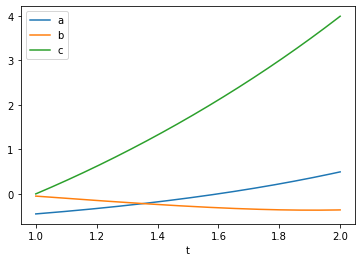

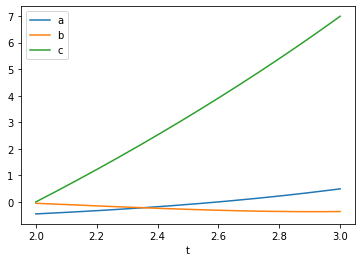

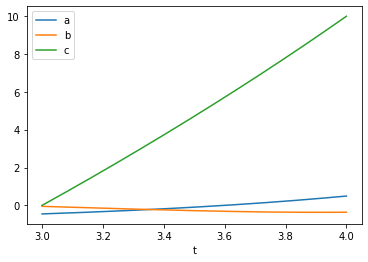

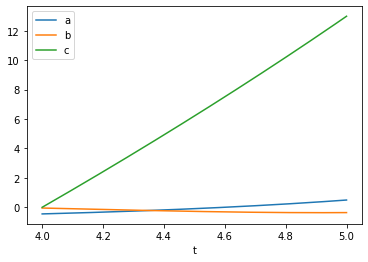

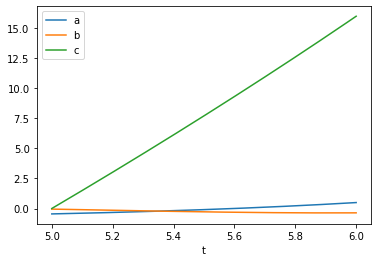

In [10]:
for i in range(1, 6):
    initial_point = (i, initial_state)
    euler = EulerEstimator(derivatives)


    estimated_points = euler.calc_estimated_points(initial_point, step_size=0.001, num_steps=1000)
    state_dict = {dimension: [point[1][dimension] for point in estimated_points] for dimension in euler.dimensions}
    t_list = [point[0] for point in estimated_points]
    df_dict = {'t': t_list}
    df_dict.update(state_dict)
    df = pd.DataFrame(df_dict)
    plot = df.plot(x="t")
    color_dict = {"a": "red", "b": "green", "c": "blue"}
    # for dimension in state_dict:
        # plot = df.plot(kind="scatter", x="t", y=dimension, ax=plot, color=color_dict[dimension])
